In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
import sys

In [3]:
import glob
import os

In [4]:
import matplotlib
%matplotlib inline

/home/amn34/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
import gensim

In [6]:
from gensim import corpora, models, similarities

In [7]:
from nltk.stem.porter import PorterStemmer

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [9]:
stop.append('said')

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

In [78]:
texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in glob.glob(os.path.join(path, '*.txt')):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    p_stem = PorterStemmer()
    stemmed_words = [p_stemmer.stem(i) for i in stopped]
    texts.append(stemmed_words)

In [92]:
for i in texts: print 'book:', i[0:50], '\n'

book: [u'hous', u'dresden', u'avenu', u'oak', u'noll', u'section', u'pasadena', u'big', u'solid', u'cool', u'look', u'hous', u'burgundi', u'brick', u'wall', u'terra', u'cotta', u'tile', u'roof', u'white', u'stone', u'trim', u'front', u'window', u'lead', u'downstair', u'upstair', u'window', u'cottag', u'type', u'lot', u'rococo', u'imit', u'stonework', u'trim', u'around', u'front', u'wall', u'attend', u'flower', u'bush', u'half', u'acr', u'fine', u'green', u'lawn', u'drift', u'gentl', u'slope', u'street'] 

book: [u'one', u'mix', u'block', u'central', u'avenu', u'block', u'yet', u'negro', u'come', u'three', u'chair', u'barber', u'shop', u'agenc', u'thought', u'relief', u'barber', u'name', u'dimitrio', u'aleidi', u'might', u'work', u'small', u'matter', u'wife', u'will', u'spend', u'littl', u'money', u'come', u'home', u'never', u'found', u'mr', u'aleidi', u'never', u'paid', u'money', u'either', u'warm', u'day', u'almost', u'end', u'march', u'stood', u'outsid', u'barber', u'shop', u'look', 

In [83]:
dictionary = corpora.Dictionary(texts)

In [84]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [115]:
corpus2 = []

for i in corpus:
    s = sorted(i, key=lambda x: x[1], reverse=True)
    corpus2.append(s[20:])
    for j in s[0:15]:
        print dictionary.get(j[0])
    print '\n\n'

look
like
back
know
went
door
would
mr
get
littl
hand
one
man
go
eye



look
like
back
one
get
man
went
littl
got
door
go
eye
hand
know
would



look
like
back
littl
know
went
one
get
door
would
hand
got
man
go
eye



look
back
went
know
get
could
one
got
would
like
man
mitchel
mr
car
door



look
get
got
like
know
one
back
would
time
mr
went
want
could
man
wade



look
like
back
know
went
would
littl
one
got
get
degarmo
go
kingsley
hand
door



look
like
back
went
door
eye
know
got
littl
man
get
would
one
car
hand





In [113]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, alpha = 'auto', id2word = dictionary, passes=10)

In [118]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0, u'0.011*look + 0.009*like + 0.008*back + 0.007*know + 0.007*went'),
 (1, u'0.012*look + 0.009*like + 0.008*back + 0.007*get + 0.007*one'),
 (2, u'0.010*look + 0.009*like + 0.009*back + 0.006*went + 0.006*door'),
 (3, u'0.010*look + 0.008*get + 0.008*back + 0.007*got + 0.007*like'),
 (4, u'0.013*look + 0.008*like + 0.008*back + 0.007*know + 0.007*went')]

In [116]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=5, alpha = 'auto', id2word = dictionary, passes=10)

In [117]:
ldamodel2.print_topics(num_topics=5, num_words=5)

[(0, u'0.004*see + 0.004*around + 0.004*light + 0.004*want + 0.004*head'),
 (1, u'0.001*someth + 0.001*see + 0.001*right + 0.001*room + 0.001*away'),
 (2, u'0.005*want + 0.005*around + 0.004*gun + 0.004*murdock + 0.004*time'),
 (3, u'0.004*littl + 0.004*way + 0.004*think + 0.004*see + 0.004*call'),
 (4, u'0.004*around + 0.004*open + 0.004*right + 0.004*way + 0.004*came')]

#### tfidf and similarities

In [119]:
tfidf = models.TfidfModel(corpus)

In [120]:
corpus_tfidf = tfidf[corpus]

In [124]:
index = similarities.MatrixSimilarity(tfidf[corpus])

In [125]:
sims = index[corpus_tfidf]

In [126]:
print sims

[[ 1.00000036  0.00745812  0.00613282  0.0040765   0.00991494  0.00413227
   0.00398679]
 [ 0.00745812  1.00000024  0.00856385  0.00429486  0.00982617  0.00537938
   0.01591069]
 [ 0.00613282  0.00856385  1.00000012  0.00765501  0.02133632  0.00746867
   0.00506177]
 [ 0.0040765   0.00429486  0.00765501  1.00000024  0.01149879  0.00275196
   0.00725088]
 [ 0.00991494  0.00982617  0.02133632  0.01149879  1.00000215  0.00815626
   0.0108847 ]
 [ 0.00413227  0.00537938  0.00746867  0.00275196  0.00815626  1.00000072
   0.00309715]
 [ 0.00398679  0.01591069  0.00506177  0.00725088  0.0108847   0.00309715
   1.00000083]]


In [127]:
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=5, alpha = 'auto', id2word = dictionary, passes=10)

/home/amn34/anaconda2/lib/python2.7/site-packages/gensim/models/ldamodel.py:527: RuntimeWarning: overflow encountered in exp2
  (perwordbound, numpy.exp2(-perwordbound), len(chunk), corpus_words))


In [128]:
ldamodel3.print_topics(num_topics=5, num_words=5)

[(0,
  u'0.000*murdock + 0.000*vannier + 0.000*hench + 0.000*morni + 0.000*phillip'),
 (1, u'0.000*lennox + 0.000*wade + 0.000*spencer + 0.000*roger + 0.000*terri'),
 (2,
  u'0.000*degarmo + 0.000*kingsley + 0.000*laveri + 0.000*patton + 0.000*almor'),
 (3,
  u'0.000*marriott + 0.000*florian + 0.000*malloy + 0.000*nulti + 0.000*grayl'),
 (4,
  u'0.000*mitchel + 0.000*geiger + 0.000*marriott + 0.000*regan + 0.000*brodi')]

#### parsing

In [16]:
from nltk import pos_tag

In [11]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/rc_bigsleep.txt').read()

In [12]:
sleep = sleep.decode('utf-8')

In [10]:
#sleepsent = sent_tokenize(sleep)

In [13]:
raw = sleep.lower()
sleepwords = tokenizer.tokenize(raw)

In [14]:
stopped = [w for w in sleepwords if not w in stop]

In [52]:
#p_stemmer = PorterStemmer()

In [53]:
#stemmed_words = [p_stemmer.stem(i) for i in stopped]

In [17]:
tagged = pos_tag(stopped)

In [143]:
from nltk import Text

In [144]:
text = nltk.Text(stopped)

In [148]:
text.similar('man')

one stare brody door enough wall moved changed gentleman anybody gun
behind calm gee sharp still tell know


In [149]:
text.similar('gun')

wig gray head right kissed norris jumped frowned revolver hand wallet
notebook little man luger worrying left


In [160]:
text.similar('cigarette')

cigar room dump scream


In [157]:
text.common_contexts(['man','gun'])

little_back


In [158]:
text.concordance('man')

Displaying 25 of 186 matches:
hot hard coal black eyes general look man would pay get along thought might gen
 holding seem bother tall thin silver man sixty close little past blue eyes rem
s could skin smooth bright moved like man sound muscles walked slowly across fl
chair wheel chair old obviously dying man watched us come black eyes fire died 
er stood front mr marlowe general old man move speak even nod looked lifelessly
acks legs sat took hat deft scoop old man dragged voice bottom well brandy norr
 brandy beneath may take coat sir hot man blood veins stood peeled coat got han
t automatically cigarette stopped old man caught gesture smiled faintly may smo
dowed comers mouth nice state affairs man indulge vices proxy dryly looking dul
soft wet heat like pall around us old man nodded neck afraid weight head butler
d shut behind jungle sipped drink old man licked lips watching drawing one lip 
orney investigator chief investigator man named bernie ohls called told wanted 
 policemen

In [178]:
text.collocations()

eddie mars; harry jones; last night; mrs regan; captain gregory; totem
pole; missing persons; general sternwood; old man; silver wig; owen
taylor; door opened; went back; joe brody; arthur gwynn; purring
voice; persons bureau; thousand dollars; laverne terrace; rusty regan


In [161]:
text.count('gun')

91

In [162]:
from nltk import FreqDist

In [163]:
fd = nltk.FreqDist(text)

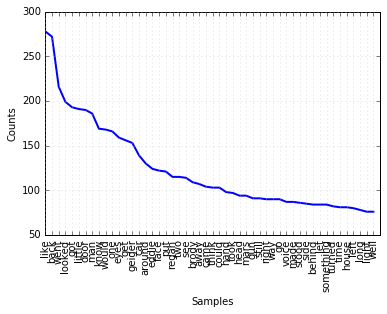

In [177]:
fd.plot(50,cumulative=False)

In [18]:
tagged[0:10]

[(u'eleven', 'RB'),
 (u'clock', 'NN'),
 (u'morning', 'NN'),
 (u'mid', 'JJ'),
 (u'october', 'NN'),
 (u'sun', 'JJ'),
 (u'shining', 'VBG'),
 (u'look', 'NN'),
 (u'hard', 'JJ'),
 (u'wet', 'NN')]

In [19]:
keeplist = ['NN', 'NNP','NNPS','NNS', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']

In [20]:
naa = []
for i in tagged:
    if i[1] in keeplist:
        naa.append(i[0])

In [21]:
naa

[u'eleven',
 u'clock',
 u'morning',
 u'mid',
 u'october',
 u'sun',
 u'look',
 u'hard',
 u'wet',
 u'rain',
 u'clearness',
 u'foothills',
 u'powder',
 u'blue',
 u'suit',
 u'dark',
 u'blue',
 u'shirt',
 u'tie',
 u'display',
 u'handkerchief',
 u'black',
 u'brogues',
 u'black',
 u'wool',
 u'socks',
 u'blue',
 u'clocks',
 u'neat',
 u'clean',
 u'sober',
 u'everything',
 u'well',
 u'dressed',
 u'private',
 u'detective',
 u'dollars',
 u'main',
 u'hallway',
 u'sternwood',
 u'place',
 u'stories',
 u'high',
 u'entrance',
 u'doors',
 u'indian',
 u'elephants',
 u'broad',
 u'glass',
 u'panel',
 u'knight',
 u'dark',
 u'armor',
 u'lady',
 u'tree',
 u'clothes',
 u'long',
 u'convenient',
 u'hair',
 u'vizor',
 u'helmet',
 u'back',
 u'sociable',
 u'knots',
 u'ropes',
 u'lady',
 u'tree',
 u'anywhere',
 u'house',
 u'later',
 u'climb',
 u'help',
 u'really',
 u'french',
 u'doors',
 u'back',
 u'hall',
 u'wide',
 u'sweep',
 u'emerald',
 u'grass',
 u'white',
 u'garage',
 u'front',
 u'slim',
 u'dark',
 u'young',
 

In [23]:
tagged_texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in glob.glob(os.path.join(path, '*.txt')):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    tagged = pos_tag(stopped)
    tagged_texts.append(tagged)